# Instalação dos Pacotes

In [2]:
!pip install qiskit[visualization] qiskit-machine-learning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 919.1 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.6/308.6 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 5.0 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=6f2e63cbe33ba93014e2669b9739888d3

# Básico de Computação Quântica

## Circuito, Operador e Vetor de Estados

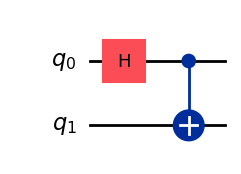

In [3]:
from qiskit.circuit import QuantumCircuit

circuit = QuantumCircuit(2)

circuit.h(0)
circuit.cx(0, 1)

circuit.draw('mpl')

In [4]:
from qiskit.quantum_info import Operator

op = Operator(circuit)

op.draw('latex')

<IPython.core.display.Latex object>

In [5]:
from qiskit.quantum_info import Statevector

input_vector = Statevector.from_label('00')

input_vector.draw('text')

[1.+0.j,0.+0.j,0.+0.j,0.+0.j]

In [6]:
final_vector = input_vector.evolve(circuit)

final_vector.draw('text')

[0.70710678+0.j,0.        +0.j,0.        +0.j,0.70710678+0.j]

In [7]:
final_vector.probabilities_dict(decimals=1)

{'00': 0.5, '11': 0.5}

## Rotação Parametrizada

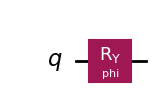

In [8]:
from qiskit.circuit import Parameter

param = Parameter('phi')

circuit = QuantumCircuit(1)

circuit.ry(param, 0)

circuit.draw('mpl')

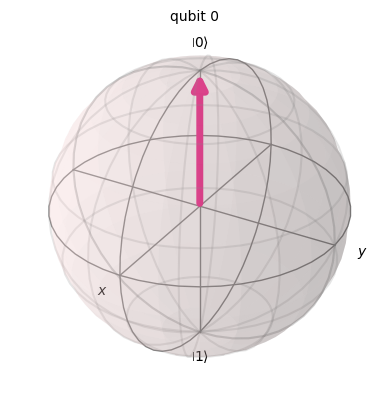

In [9]:
input_vector = Statevector.from_label('0')

input_vector.draw('bloch')

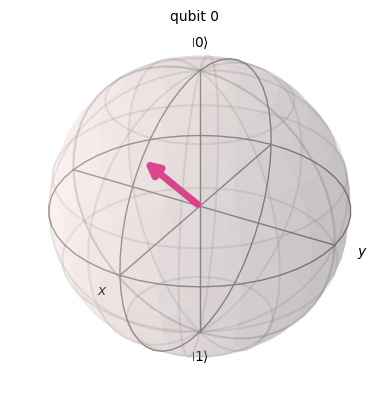

In [10]:
circuit.assign_parameters([0.8], inplace=True)

final_vector = input_vector.evolve(circuit)

final_vector.draw('bloch')

In [11]:
final_vector.draw('text')

[0.92106099+0.j,0.38941834+0.j]

# Circuitos Quânticos Variacionais

## Mapeamento de Informação

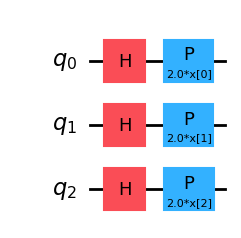

In [12]:
from qiskit.circuit.library import ZFeatureMap

fmap = ZFeatureMap(3, reps=1)

fmap.decompose().draw('mpl')

In [13]:
import numpy as np

classical_data = np.random.rand(3)

classical_data

array([0.91495019, 0.45048119, 0.95865705])

In [14]:
fmap.assign_parameters(classical_data, inplace=True)

quantum_data = Statevector(fmap)

quantum_data.draw('text')

[ 0.35355339+0.j        ,-0.09058555+0.34175175j, 0.21950568+0.27715926j,
 -0.32414823+0.14116631j,-0.12007544+0.33253855j,-0.29067331-0.20126855j,
 -0.33523474+0.11232839j,-0.02268681-0.35282476j]

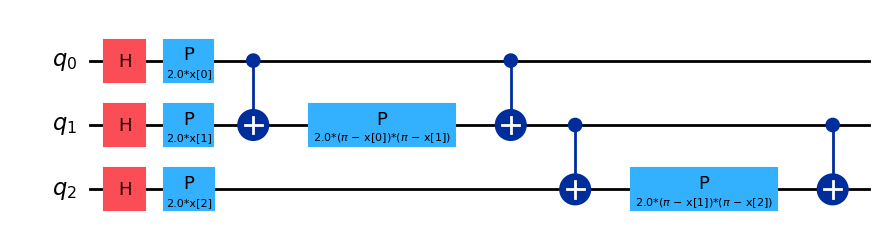

In [15]:
from qiskit.circuit.library import ZZFeatureMap

fmap = ZZFeatureMap(3, reps=1, entanglement='linear')

fmap.decompose().draw('mpl')

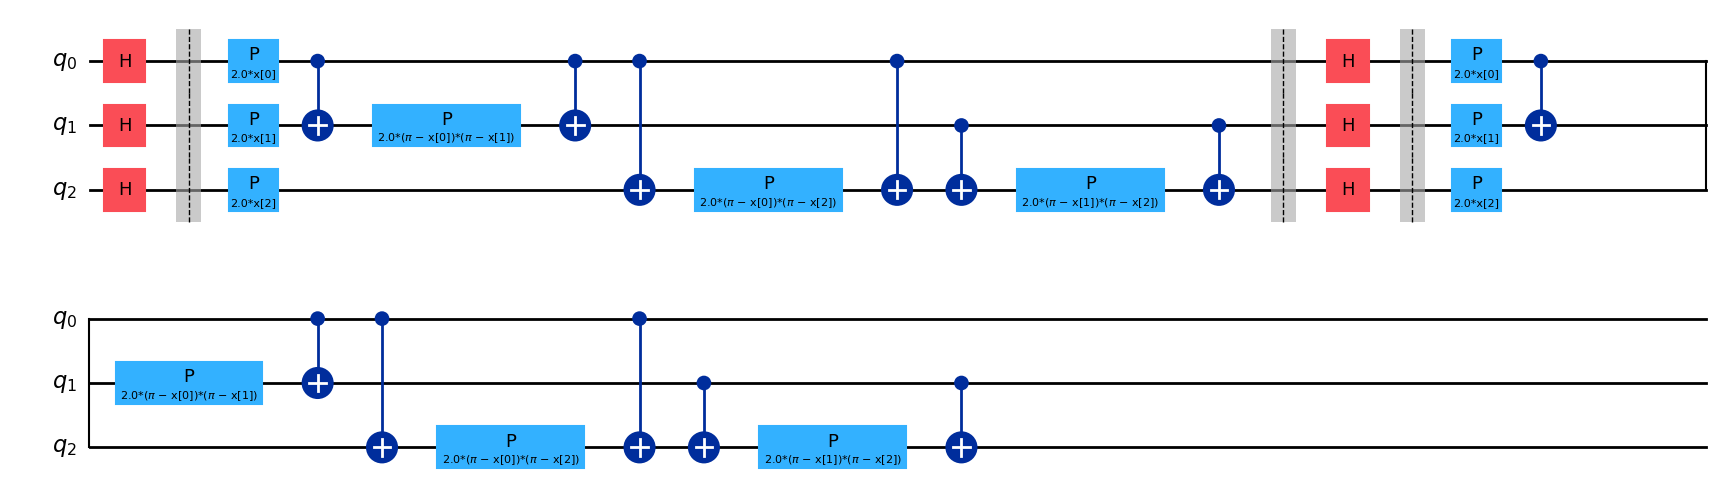

In [16]:
fmap = ZZFeatureMap(3, reps=2, entanglement='full', insert_barriers=True)

fmap.decompose().draw('mpl')

## Processamento Variacional

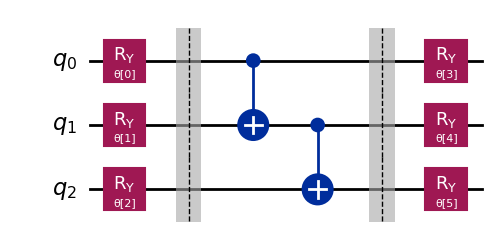

In [17]:
from qiskit.circuit.library import EfficientSU2

ansatz = EfficientSU2(3, 'ry', reps=1, entanglement='linear', insert_barriers=True)

ansatz.decompose().draw('mpl')

In [18]:
weights = np.random.rand(ansatz.num_parameters)

ansatz.assign_parameters(weights, inplace=True)

Operator(ansatz).draw('latex')

<IPython.core.display.Latex object>

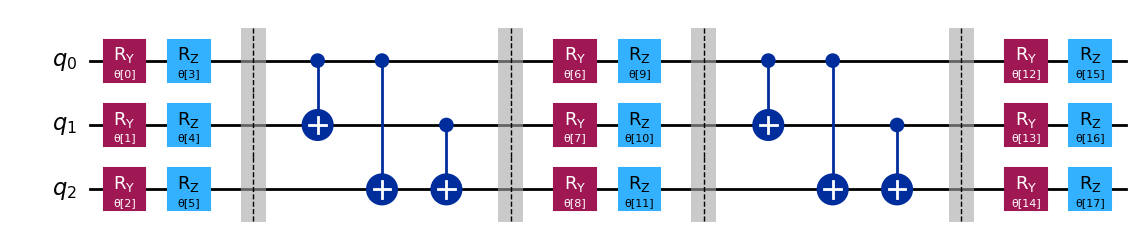

In [19]:
ansatz = EfficientSU2(3, ['ry', 'rz'], reps=2, entanglement='full', insert_barriers=True)

ansatz.decompose().draw('mpl')

In [20]:
weights = np.random.rand(ansatz.num_parameters)

ansatz.assign_parameters(weights, inplace=True)

Operator(ansatz).draw('latex')

<IPython.core.display.Latex object>

## Observáveis

In [21]:
np.random.seed(0)

fmap = ZZFeatureMap(3)
classical_data = np.random.rand(3)
fmap.assign_parameters(classical_data, inplace=True)

ansatz = EfficientSU2(3)
weights = np.random.rand(ansatz.num_parameters)
ansatz.assign_parameters(weights, inplace=True)

vqc = fmap.compose(ansatz)

final_vector = Statevector(vqc)

final_vector.draw('text')

[-0.08456536-0.05947687j,-0.23828627-0.22764237j,-0.27766806-0.28009076j,
 -0.35483239+0.13734714j, 0.17090091-0.21407367j,-0.20439011-0.2141409j ,
  0.10836525+0.18652723j,-0.59612162-0.12580316j]

In [22]:
from qiskit.quantum_info import random_pauli

observable = random_pauli(3)

observable.to_label()

'XYZ'

In [23]:
final_vector.expectation_value(observable)

0.18628838876347165

# Noções de Aplicação

In [24]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler

iris = load_iris()

idx_samples = range(50, 150, 5)

features = iris.data[idx_samples]
features = MinMaxScaler().fit_transform(features)

labels = iris.target[idx_samples]
labels[labels == 2] = -1
labels

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1])

## Mensurando Desempenho

In [27]:
from qiskit_machine_learning.neural_networks import EstimatorQNN

fmap = ZZFeatureMap(4)
ansatz = EfficientSU2(4)
vqc = fmap.compose(ansatz)

observable = random_pauli(4)

estimator = EstimatorQNN(circuit=vqc,
                         input_params=fmap.parameters,
                         weight_params=ansatz.parameters,
                         observables=observable)

np.random.seed(None)
weights = np.random.rand(ansatz.num_parameters)

outputs = estimator.forward(features, weights)

outputs

array([[-0.40347636],
       [ 0.20276996],
       [-0.00630628],
       [ 0.38855726],
       [ 0.1396186 ],
       [ 0.16901105],
       [ 0.00203174],
       [ 0.18177854],
       [ 0.05076087],
       [-0.5189206 ],
       [-0.12014912],
       [ 0.43480547],
       [ 0.16967387],
       [ 0.00779055],
       [ 0.26171901],
       [ 0.13209796],
       [-0.01378581],
       [ 0.51210726],
       [ 0.08515652],
       [ 0.18324345]])

In [28]:
pred_labels = np.sign(outputs.flatten())

pred_labels

array([-1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,  1.,  1.,
        1.,  1.,  1., -1.,  1.,  1.,  1.])

In [29]:
from sklearn.metrics import accuracy_score

accuracy_score(labels, pred_labels)

0.45

## Otimizando o Modelo

In [30]:
from qiskit_algorithms.optimizers import COBYLA
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier

optim = COBYLA(maxiter=100)

clf = NeuralNetworkClassifier(estimator, initial_point=weights, optimizer=optim)

clf.fit(features, labels)

In [31]:
pred_labels = clf.predict(features).flatten()

pred_labels

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1.])

In [32]:
accuracy_score(labels, pred_labels)

1.0